<a href="https://colab.research.google.com/github/gopalrawat14/firstgit/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Importing Necessary Libraries and Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the dataset
url = "https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python"
# Assuming you have downloaded the dataset locally as 'Mall_Customers.csv'
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Step 2: Data Preprocessing

In [6]:
# Check if 'CustomerID' column exists before dropping
if 'CustomerID' in df.columns:
    df.drop(['CustomerID'], axis=1, inplace=True)
else:
    print("'CustomerID' column not found or already dropped.")

# Check data types and convert categorical variables if needed
# (Assuming no categorical variables to convert for this example)

# Select only numeric columns for scaling
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Standardize the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_features, columns=numeric_cols)

# Check the scaled data
print(df_scaled.head())


'CustomerID' column not found or already dropped.
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


Step 3: Choosing the Number of Clusters (K)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

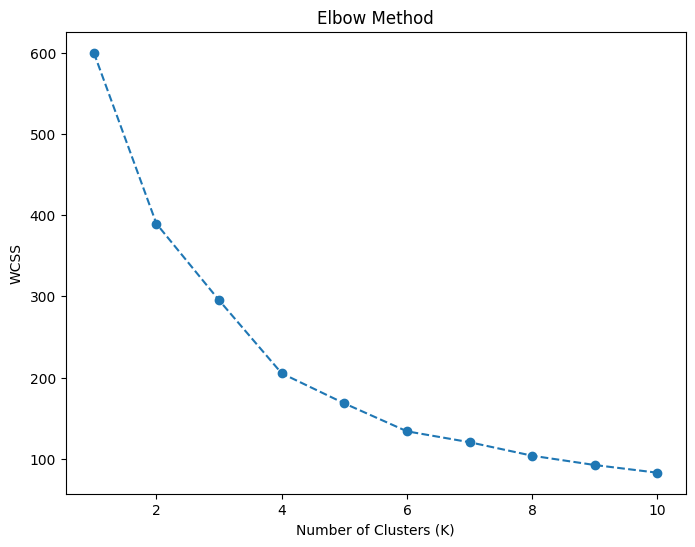

In [7]:
# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Within-Cluster Sum of Squares (WCSS) for different number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Step 4: Training the K-means Model and Visualizing Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


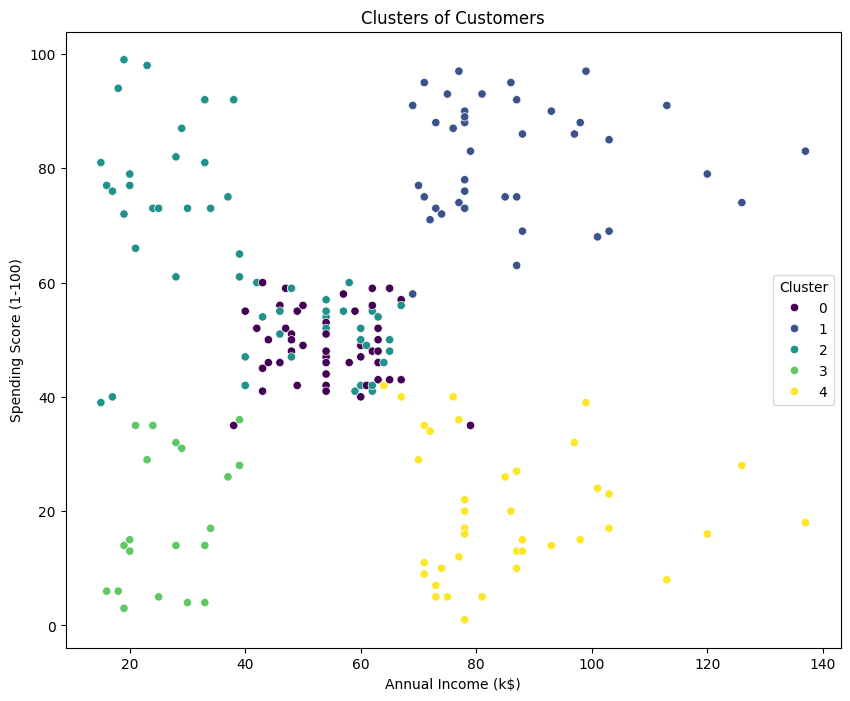

In [8]:
# Based on the elbow method, choose K (number of clusters)
k = 5

# Train the K-means model
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Visualize the clusters (for 2D visualizations, use PCA or TSNE for dimensionality reduction)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
